In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.graphics.gofplots as sm
import seaborn as sns
from scipy.stats import beta

In [2]:
# import dataset
ds = pd.read_csv("covid_data_apr_13.csv") 
ds.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.719290,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
1,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.716600,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181.0,NaN,NaN
2,000-1-10,30,male,Hefei City,Anhui,China,31.794440,117.342800,admin2,17.01.2020,...,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.915280,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
4,000-1-100,44,male,NaN,Zurich,Switzerland,47.417813,8.655968,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurich,Switzerland,26.0,NaN,NaN


In [60]:
china = ds[ds.country.eq("China")]
china

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
1,000-1-1,30,male,"Chaohu City, Hefei City",Anhui,China,31.64696,117.7166,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181.0,NaN,NaN
2,000-1-10,30,male,Hefei City,Anhui,China,31.79444,117.3428,admin2,17.01.2020,...,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100.0,NaN,NaN
5,000-1-100,65,female,Shenzhen City,Guangdong,China,22.65389,114.1291,admin2,03.01.2020,...,NaN,NaN,NaN,NaN,Shenzhen City,Guangdong,China,440300.0,NaN,NaN
6,000-1-1000,NaN,NaN,Nantong City,Jiangsu,China,32.19750,121.0053,admin2,NaN,...,NaN,NaN,NaN,NaN,Nantong City,Jiangsu,China,320600.0,NaN,NaN
8,000-1-10000,8-68,NaN,Xuzhou City,Jiangsu,China,34.35680,117.5145,admin2,NaN,...,NaN,NaN,NaN,NaN,Xuzhou City,Jiangsu,China,320300.0,NaN,NaN
9,000-1-10001,8-68,NaN,Changzhou City,Jiangsu,China,31.62592,119.6369,admin2,NaN,...,NaN,NaN,NaN,NaN,Changzhou City,Jiangsu,China,320400.0,NaN,NaN
10,000-1-10002,8-68,NaN,Changzhou City,Jiangsu,China,31.62592,119.6369,admin2,NaN,...,NaN,NaN,NaN,NaN,Changzhou City,Jiangsu,China,320400.0,NaN,NaN
11,000-1-10003,8-68,NaN,Changzhou City,Jiangsu,China,31.62592,119.6369,admin2,NaN,...,NaN,NaN,NaN,NaN,Changzhou City,Jiangsu,China,320400.0,NaN,NaN
12,000-1-10004,8-68,NaN,Lianyungang City,Jiangsu,China,34.53400,119.1325,admin2,NaN,...,NaN,NaN,NaN,NaN,Lianyungang City,Jiangsu,China,320700.0,NaN,NaN
13,000-1-10005,8-68,NaN,Lianyungang City,Jiangsu,China,34.53400,119.1325,admin2,NaN,...,NaN,NaN,NaN,NaN,Lianyungang City,Jiangsu,China,320700.0,NaN,NaN


In [47]:
china.province.unique()

array(['Anhui', 'Guangdong', 'Jiangsu', 'Jiangxi', 'Hainan', 'Shaanxi',
       'Liaoning', 'Yunnan', 'Jilin', 'Heilongjiang', 'Tianjin', 'Hebei',
       'Shanxi', 'Gansu', 'Inner Mongolia', 'Hong Kong', 'Macau',
       'Ningxia', 'Xinjiang', 'Qinghai', 'Shandong', 'Shanghai',
       'Sichuan', 'Zhejiang', 'Guangxi', 'Hunan', 'Henan', 'Chongqing',
       'Fujian', 'Beijing', 'Guizhou', 'Tibet', 'Ontario', 'Hubei'],
      dtype=object)

In [48]:
china.city.unique()

array(['Chaohu City, Hefei City', 'Hefei City', 'Shenzhen City',
       'Nantong City', 'Xuzhou City', 'Changzhou City',
       'Lianyungang City', "Huai'an City", 'Yangzhou City', 'Wuxi City',
       'Suqian City', 'Yancheng City', 'Nanchang City', 'Yichun City',
       'Shangrao City', 'Xinyu City', 'Ganzhou City', 'Taizhou City',
       'Fuzhou City', 'Jiujiang City', 'Zhenjiang City',
       'Jingdezhen City', 'Sanya City', 'Pingxiang City',
       'Tongchuan City', 'Yingtan City', "Ji'an City", 'Shangluo City',
       'Hanzhong City', 'Dandong City', 'Jinzhou City', 'Baoshan City',
       'Zhaotong City', 'Zhenlai County, Baicheng City',
       'Longshan District, Liaoyuan City',
       'Gongzhuling City, Siping City', 'Changchun City', 'Siping City',
       'Tonghua City', 'Meihekou City, Tonghua City', 'Liaoyuan City',
       'Dehong Prefecture', 'Jilin City', 'Yanbian Prefecture',
       'Pixel Park, Economic Development Zone, Jinkai District, Changchun City',
       'Dongliao 

In [49]:
city_counts = china['city'].value_counts()
city_counts

Wuhan City                                                          13663
Xiaogan City                                                         1262
Huanggang City                                                       1130
Wenzhou City                                                          994
Shenzhen City                                                         712
Suizhou City                                                          651
Xiangyang City                                                        619
Jingzhou City                                                         564
Guangzhou City                                                        554
Yichang City                                                          537
Ezhou City                                                            514
Jingmen City                                                          485
Huangshi City                                                         427
Changsha City                         

In [50]:
city_counts_arr = np.array(city_counts)
city_counts_arr

array([13663,  1262,  1130,   994,   712,   651,   619,   564,   554,
         537,   514,   485,   427,   416,   396,   343,   342,   336,
         328,   318,   276,   252,   246,   244,   236,   235,   232,
         228,   220,   218,   204,   202,   201,   188,   178,   178,
         178,   175,   172,   172,   166,   140,   139,   138,   136,
         130,   130,   128,   126,   122,   120,   118,   116,   112,
         110,   110,   106,   102,   100,   100,    98,    98,    92,
          92,    87,    86,    86,    84,    82,    81,    80,    77,
          76,    76,    76,    75,    70,    68,    68,    68,    66,
          66,    64,    64,    62,    60,    60,    60,    57,    56,
          54,    54,    54,    52,    52,    52,    50,    50,    50,
          49,    49,    48,    48,    48,    46,    46,    44,    44,
          44,    42,    42,    42,    42,    40,    40,    38,    38,
          38,    38,    38,    38,    38,    37,    36,    36,    36,
          36,    36,

In [51]:
def get_first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)

In [52]:
city_first_dig = [get_first_digit(x) for x in city_counts_arr]
city_first_dig

[1,
 1,
 1,
 9,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


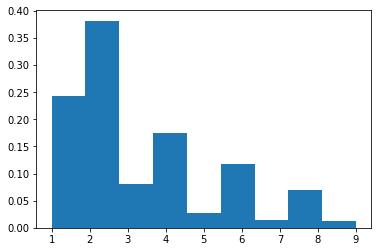

In [61]:
h = plt.hist(city_first_dig,bins=9,density=True)

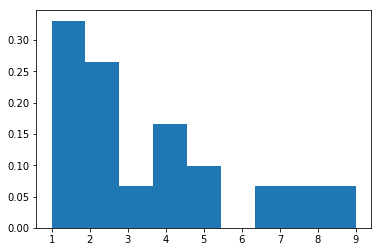

In [62]:
prov_counts = china['province'].value_counts()
prov_first_dig = [get_first_digit(x) for x in prov_counts]
h = plt.hist(prov_first_dig,bins=9,density=True)

In [56]:
korea = ds[ds.country.eq("South Korea")]
korea

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
1435,000-1-11171,24,male,National Medical Center,Seoul,South Korea,37.567670,127.005700,point,06.02.2020,...,NaN,NaN,National Medical Center,NaN,NaN,Seoul,South Korea,16.0,NaN,NaN
1540,000-1-11262,30,female,NaN,NaN,South Korea,36.378190,127.797500,admin0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,South Korea,213.0,NaN,NaN
1583,000-1-11299,46,male,Chosun University Hospital,NaN,South Korea,35.141914,126.919489,point,NaN,...,NaN,NaN,Chosun University Hospital,NaN,NaN,Gwangju,South Korea,7.0,NaN,NaN
1588,000-1-11300,57,female,National Medical Center,Seoul,South Korea,37.567670,127.005700,point,03.02.2020,...,NaN,NaN,National Medical Center,NaN,NaN,Seoul,South Korea,16.0,NaN,NaN
1600,000-1-11316,82,male,Seoul,Seoul,South Korea,37.566670,126.966700,point,NaN,...,NaN,NaN,Seoul,NaN,NaN,Seoul,South Korea,16.0,NaN,NaN
1613,000-1-11327,NaN,NaN,NaN,NaN,South Korea,36.378190,127.797500,admin0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,South Korea,213.0,NaN,NaN
1883,000-1-11555,NaN,NaN,NaN,North Gyeongsang,South Korea,36.317400,128.749300,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,North Gyeongsang,South Korea,9.0,NaN,NaN
1884,000-1-11556,NaN,NaN,NaN,North Gyeongsang,South Korea,36.317400,128.749300,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,North Gyeongsang,South Korea,9.0,NaN,NaN
1885,000-1-11557,NaN,NaN,NaN,North Gyeongsang,South Korea,36.317400,128.749300,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,North Gyeongsang,South Korea,9.0,NaN,NaN
1886,000-1-11558,NaN,NaN,NaN,North Gyeongsang,South Korea,36.317400,128.749300,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,North Gyeongsang,South Korea,9.0,NaN,NaN


In [35]:
korea.province.unique()

array(['Seoul', nan, 'North Gyeongsang', 'Daegu', 'Busan',
       'North Chungcheong', 'Gwangju', 'North Jeolla', 'Sejong', 'Jeju',
       'Gangwon', 'Ulsan', 'South Jeolla', 'Gyeonggi', 'South Gyeongsang',
       'Incheon', 'Daejeon', 'South Chungcheong'], dtype=object)

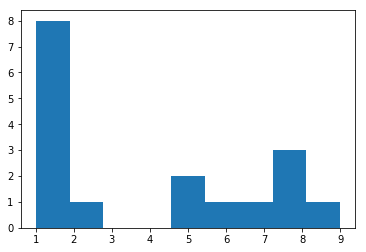

In [44]:
prov_counts_kr = korea['province'].value_counts()
prov_first_dig_kr = [get_first_digit(x) for x in prov_counts_kr]
h = plt.hist(prov_first_dig_kr,bins=9)

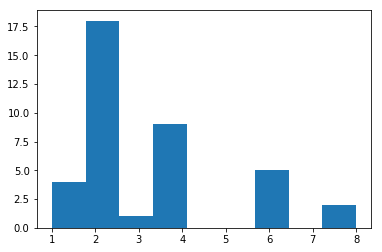

In [45]:
city_counts_kr = korea['city'].value_counts()
city_first_dig_kr = [get_first_digit(x) for x in city_counts_kr]
h = plt.hist(city_first_dig_kr,bins=9)

In [42]:
us = ds[ds.country.eq("United States")]
us

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.719290,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.915280,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
638,000-1-1052,20-29,female,Cumberland County,Maine,United States,43.848431,-70.408373,admin2,NaN,...,NaN,NaN,NaN,NaN,Cumberland County,Maine,United States,1179.0,NaN,NaN
650,000-1-1053,20-29,male,Cumberland County,Maine,United States,43.848431,-70.408373,admin2,NaN,...,NaN,NaN,NaN,NaN,Cumberland County,Maine,United States,1179.0,NaN,NaN
663,000-1-1054,50-59,female,Androscoggin County,Maine,United States,44.166210,-70.206632,admin2,NaN,...,NaN,NaN,NaN,NaN,Androscoggin County,Maine,United States,1177.0,NaN,NaN
674,000-1-1055,18-99,male,Rockingham County,New Hampshire,United States,42.986569,-71.129228,admin2,NaN,...,NaN,NaN,NaN,NaN,Rockingham County,New Hampshire,United States,1774.0,NaN,NaN
748,000-1-1061,NaN,NaN,Berkshire County,Massachusetts,United States,42.371827,-73.207218,admin2,NaN,...,NaN,NaN,NaN,NaN,Berkshire County,Massachusetts,United States,1217.0,NaN,NaN
760,000-1-1062,NaN,NaN,Berkshire County,Massachusetts,United States,42.371827,-73.207218,admin2,NaN,...,NaN,NaN,NaN,NaN,Berkshire County,Massachusetts,United States,1217.0,NaN,NaN
772,000-1-1063,NaN,NaN,Essex County,Massachusetts,United States,42.672592,-70.956154,admin2,NaN,...,NaN,NaN,NaN,NaN,Essex County,Massachusetts,United States,1220.0,NaN,NaN
784,000-1-1064,NaN,NaN,Middlesex County,Massachusetts,United States,42.486092,-71.392397,admin2,NaN,...,NaN,NaN,NaN,NaN,Middlesex County,Massachusetts,United States,1224.0,NaN,NaN


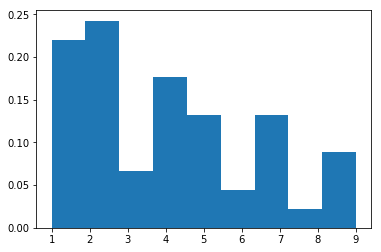

In [63]:
prov_counts_us = us['province'].value_counts()
prov_first_dig_us = [get_first_digit(x) for x in prov_counts_us]
h = plt.hist(prov_first_dig_us,bins=9,density=True)

In [57]:
no_china = ds[ds.country.ne("China")]
no_china

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,60-69,female,Whatcom County,Washington,United States,48.826129,-121.719290,admin2,NaN,...,NaN,NaN,NaN,NaN,Whatcom County,Washington,United States,2994.0,NaN,NaN
3,000-1-10,60-69,female,Pitkin County,Colorado,United States,39.217302,-106.915280,admin2,NaN,...,NaN,NaN,NaN,NaN,Pitkin County,Colorado,United States,291.0,NaN,NaN
4,000-1-100,44,male,NaN,Zurich,Switzerland,47.417813,8.655968,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurich,Switzerland,26.0,NaN,NaN
7,000-1-1000,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
19,000-1-1001,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
31,000-1-1002,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
43,000-1-1003,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
55,000-1-1004,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
67,000-1-1005,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN
79,000-1-1006,NaN,NaN,NaN,Hamburg,Germany,53.546610,10.020720,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,Hamburg,Germany,6.0,NaN,NaN


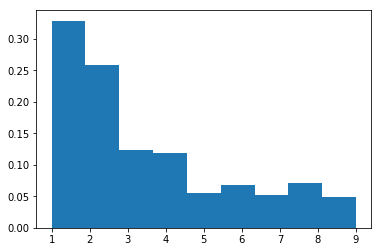

In [64]:
prov_counts_no_ch = no_china['province'].value_counts()
prov_first_dig_no_ch = [get_first_digit(x) for x in prov_counts_no_ch]
h = plt.hist(prov_first_dig_no_ch,bins=9,density=True)